## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from K_Nearest_Neighbors.models.k_nearest_neighbors import KNearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
    classification_report, accuracy_score, auc, roc_curve, \
    RocCurveDisplay
from matplotlib.colors import LinearSegmentedColormap

## Download dataset

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("jahnavipaliwal/mountains-vs-beaches-preference")

print(os.listdir(path)[0])

mountains_vs_beaches_preferences.csv


## Set display options and style

In [3]:
style.use("dark_background")

pd.set_option("display.max_columns", 500)
pd.set_option("expand_frame_repr", False)


## Load and inspect the dataset

In [4]:
filename = os.listdir(path)[0]
df = pd.read_csv(os.path.join(path, filename))
print(df.head())
print(df.info())

   Age      Gender  Income Education_Level  Travel_Frequency Preferred_Activities  Vacation_Budget  Location  Proximity_to_Mountains  Proximity_to_Beaches Favorite_Season  Pets  Environmental_Concerns  Preference
0   56        male   71477        bachelor                 9               skiing             2477     urban                     175                   267          summer     0                       1           1
1   69        male   88740          master                 1             swimming             4777  suburban                     228                   190            fall     0                       1           0
2   46      female   46562          master                 0               skiing             1469     urban                      71                   280          winter     0                       0           1
3   32  non-binary   99044     high school                 6               hiking             1482     rural                      31                

## Check for null values

In [5]:
df.isna().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

## Data distribution

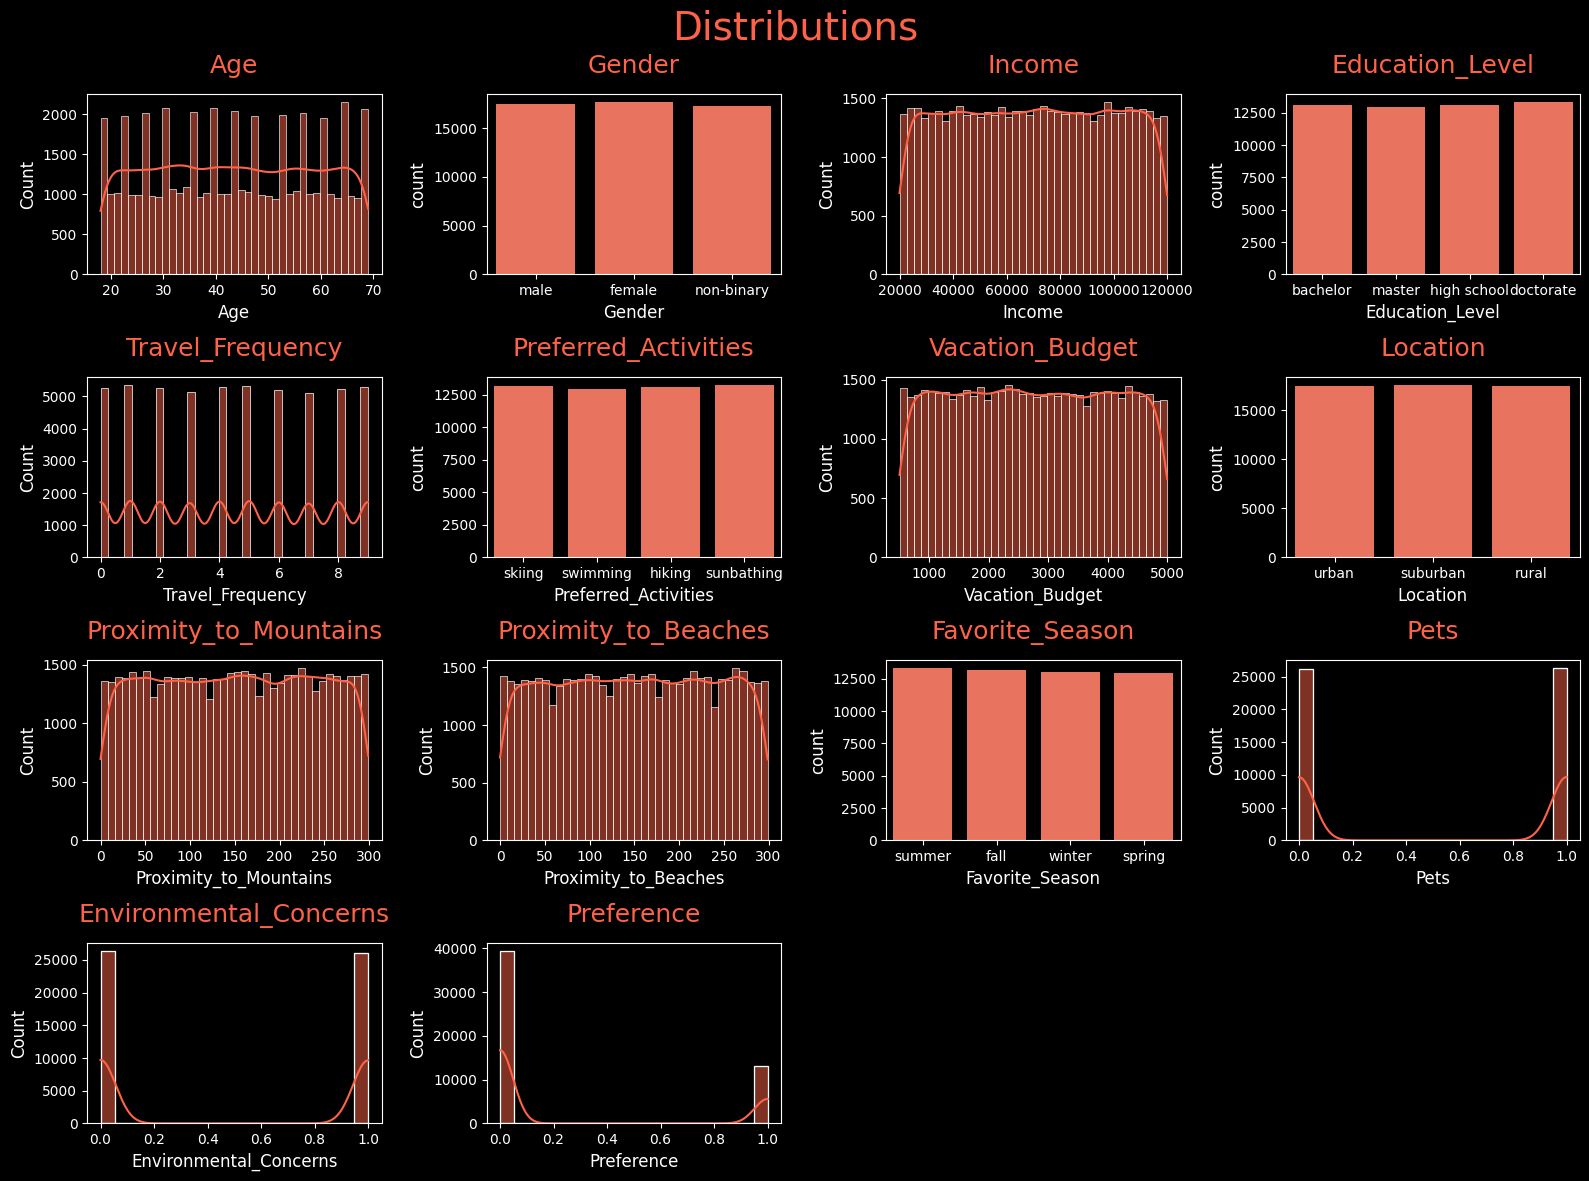

In [6]:
from utils.plot import Plot

Plot.set_plot_params(figsize=(16,12))
Plot.histplot(data=df, rows=4, columns=4, color="tomato")

All features are distributed proportionally.

## Data distributions by "Preference"

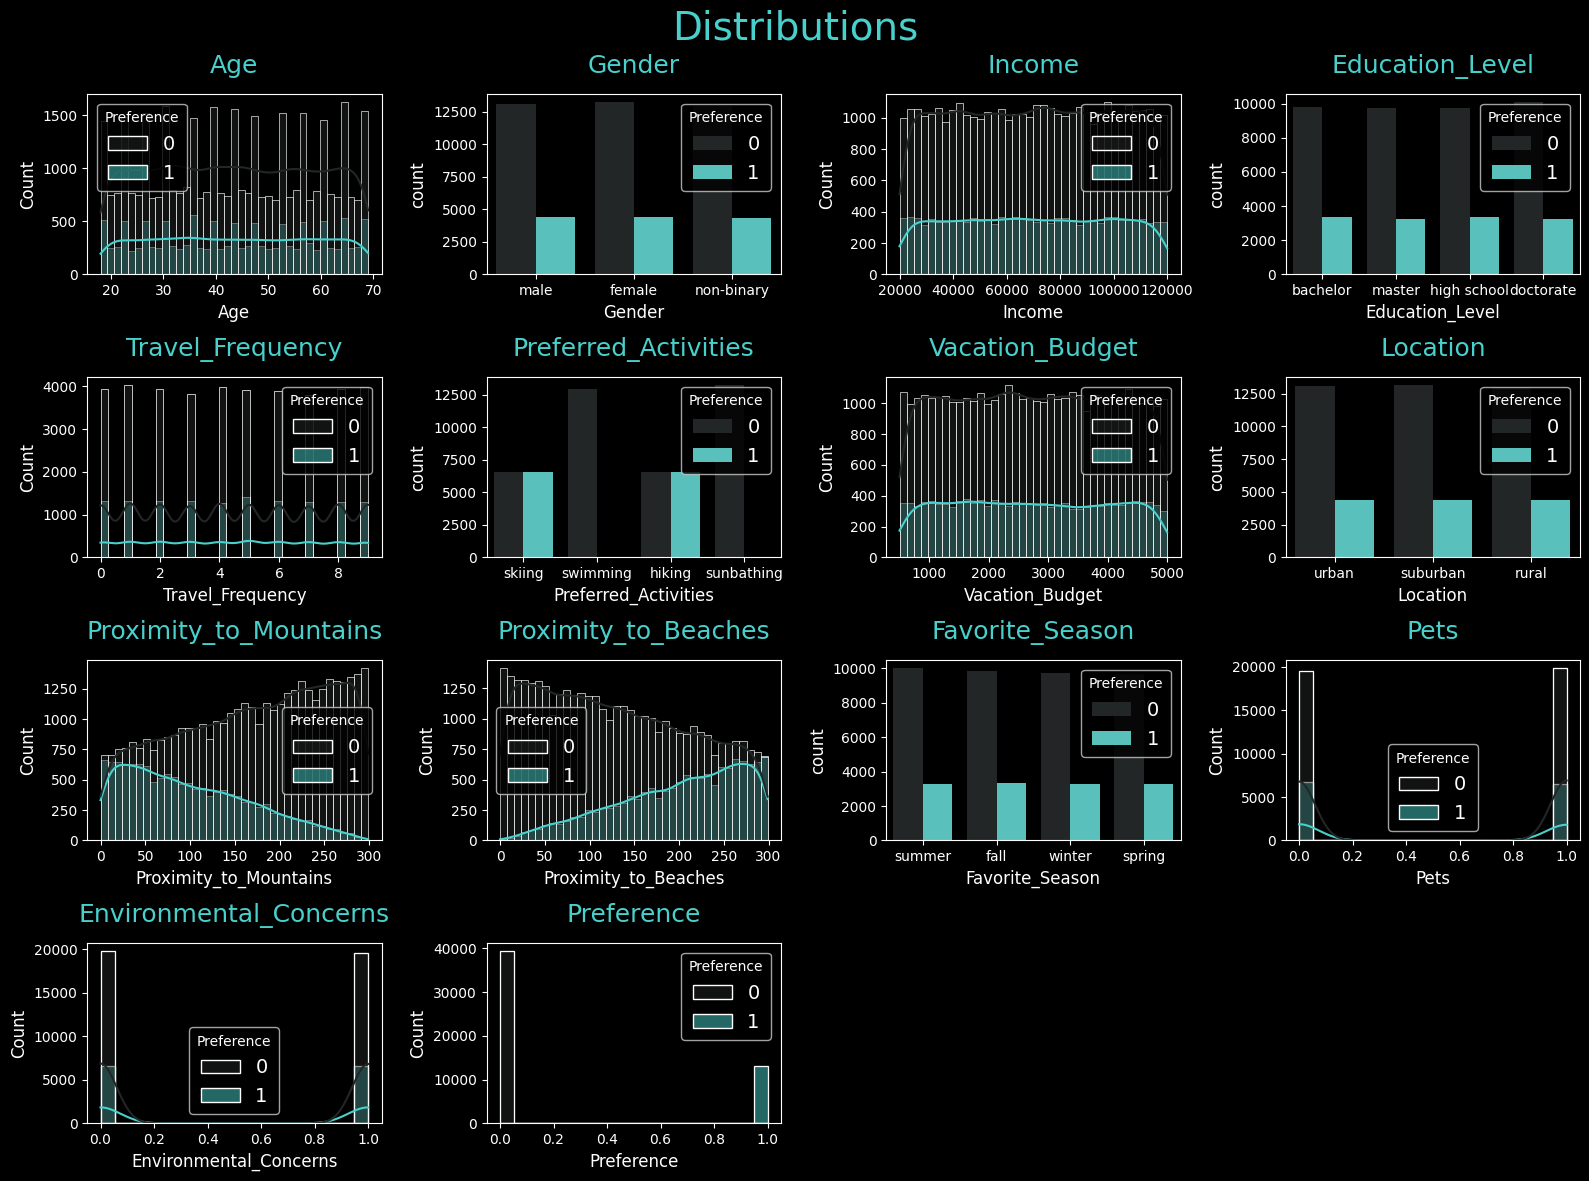

In [7]:
Plot.histplot(data=df, rows=4, columns=4, color="mediumturquoise", hue="Preference")

## Features vs target

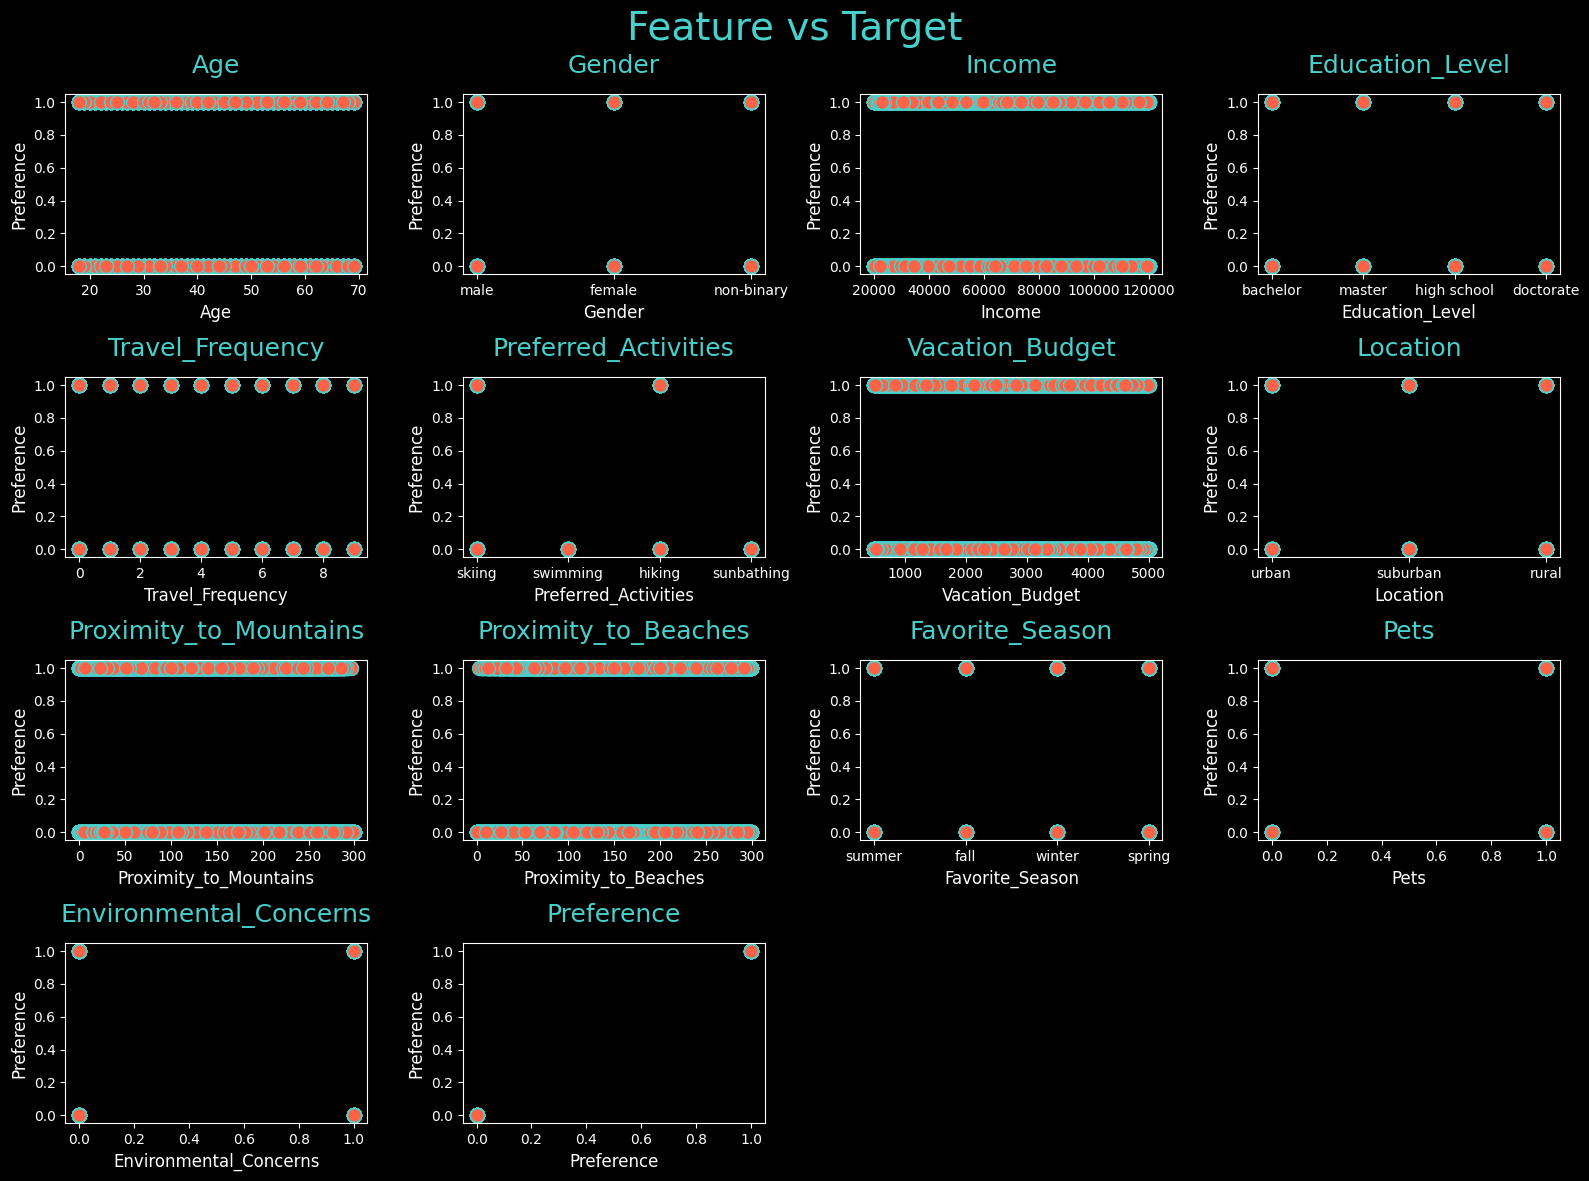

In [8]:
Plot.feature_vs_target(data=df, target="Preference", rows=4, columns=4, color="mediumturquoise", scatter_color="tomato")

There is no visible connection between features and target variable except Preffered_Activities.

## Convert data into categorical features

In [9]:
df = pd.get_dummies(df)
print(df.head())
print(df.info())

   Age  Income  Travel_Frequency  Vacation_Budget  Proximity_to_Mountains  Proximity_to_Beaches  Pets  Environmental_Concerns  Preference  Gender_female  Gender_male  Gender_non-binary  Education_Level_bachelor  Education_Level_doctorate  Education_Level_high school  Education_Level_master  Preferred_Activities_hiking  Preferred_Activities_skiing  Preferred_Activities_sunbathing  Preferred_Activities_swimming  Location_rural  Location_suburban  Location_urban  Favorite_Season_fall  Favorite_Season_spring  Favorite_Season_summer  Favorite_Season_winter
0   56   71477                 9             2477                     175                   267     0                       1           1          False         True              False                      True                      False                        False                   False                        False                         True                            False                          False           False              

## Heatmap of correlated features to target

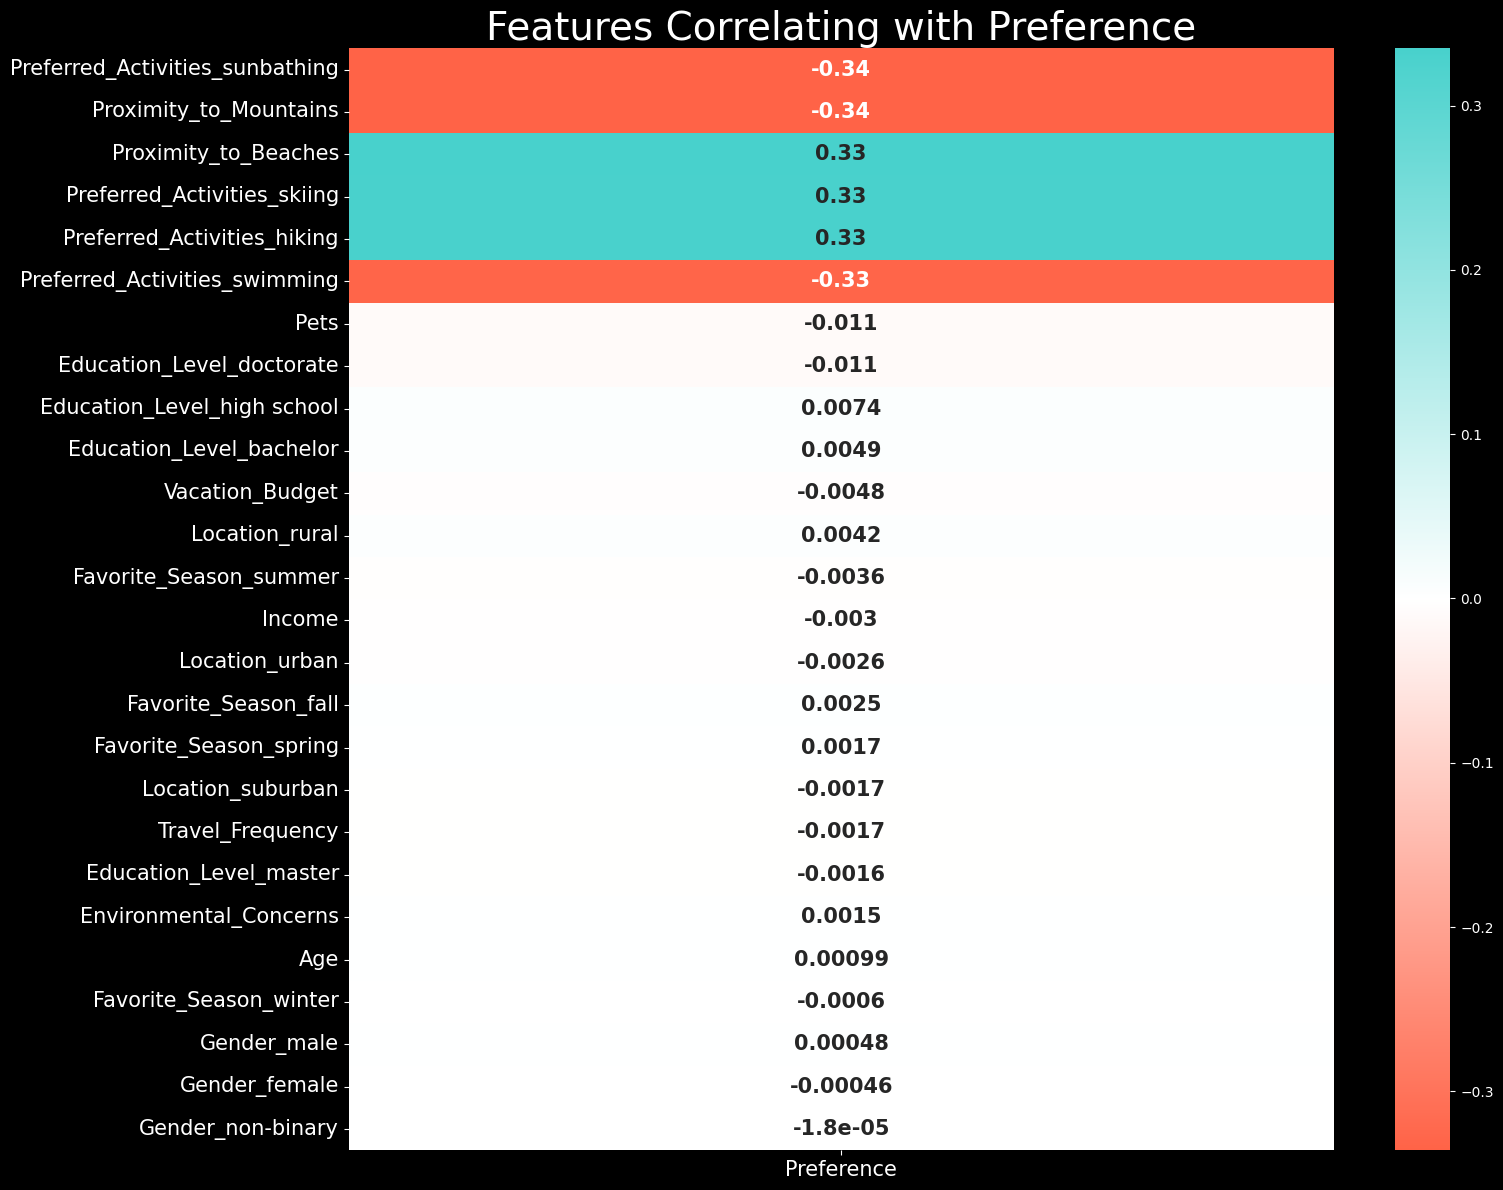

In [10]:
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors=["tomato", "white", "mediumturquoise"], N=1000)
Plot.heatmap_features_target(df=df, target="Preference", cmap=cmap)

There are only 6 columns that are relatively correlated to the target. It is preffered activities and proximity to mountains or beaches.

## Drop unnecessary columns

In [11]:
new_columns = ["Preference"]

for column in df.columns:
    if (column.startswith("Preferred_Activities")) or (column.startswith("Proximity")):
        new_columns.append(column)

In [12]:
df = df[new_columns]
print(df.head())
print(df.info())

   Preference  Proximity_to_Mountains  Proximity_to_Beaches  Preferred_Activities_hiking  Preferred_Activities_skiing  Preferred_Activities_sunbathing  Preferred_Activities_swimming
0           1                     175                   267                        False                         True                            False                          False
1           0                     228                   190                        False                        False                            False                           True
2           1                      71                   280                        False                         True                            False                          False
3           1                      31                   255                         True                        False                            False                          False
4           0                      23                   151                        False  

## Split the data into features and target variable

In [13]:
X = df.drop(columns=["Preference"]).values
y = df["Preference"].values

## Split the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create models dictionary for custom and sklearn models

In [16]:
models = [
    {
        "name": "Custom KNN",
        "model": KNearestNeighbors,
        "color": "tomato",
        "edgecolor": "red",
        "y_pred": [],
        "y_pred_proba": [],
        "best_k": 0
    },
    {
        "name": "Sklearn KNN",
        "model": KNeighborsClassifier,
        "color": "mediumturquoise",
        "edgecolor": "green",
        "y_pred": [],
        "y_pred_proba": [],
        "best_k": 0
    }
]

In [ ]:
def get_k_error_rates(model, k_range):
    # create error_rates list for storing error_rate for eachk/n_neigbors (number of neighbors)
    error_rates = []
    # for each k between 1 and k_range
    for k in range(1, k_range):
        # create K Nearest Neighbors model
        knn = model(n_neighbors=k)
        # fit model
        knn.fit(X_train, y_train)
        # get predictions
        y_pred = knn.predict(X_test)
        # get accuracy
        accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
        # append error rate to list
        error_rates.append(1-accuracy)
    
    return error_rates

## Custom and sklearn models error rates based on `n_neighbors`

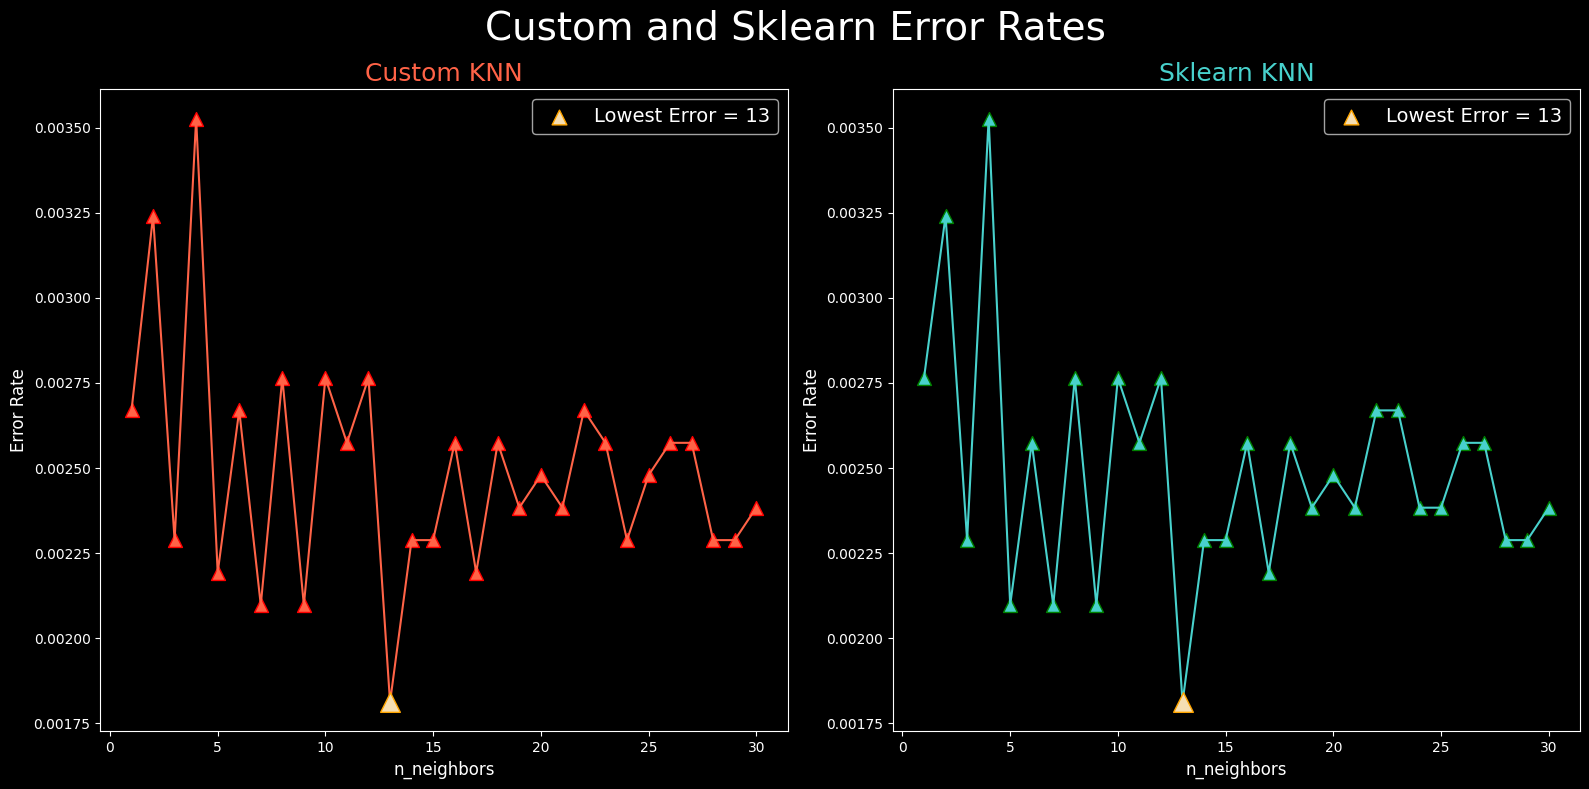

In [ ]:
# plot eror rates for each model to get the best n_neighbors for each model. 
# The smaller erorr - the better n_neighbor parameter.

Plot.set_plot_params()

k_range = 31

plt.suptitle(t="Custom and Sklearn Error Rates")
for index, model in enumerate(models):
    plt.subplot(1, 2, index + 1)
    plt.title(label=model["name"], color=model["color"])
    plt.xlabel(xlabel="n_neighbors")
    plt.ylabel(ylabel="Error Rate")

    # get error_rates
    error_rates = get_k_error_rates(model=model["model"], k_range=k_range)

    # get best n_neighbors parameter
    best_k = np.argmin(error_rates) + 1
    # save best n_neighbor for each model
    model["best_k"] = best_k

    plt.plot(range(1, k_range), error_rates, color=model["color"])
    plt.scatter(x=range(1, k_range), y=error_rates, s=100, c=model["color"], 
                edgecolors=model["edgecolor"], marker="^")
    plt.scatter(x=best_k, y=error_rates[best_k - 1], s=200, c="wheat", 
                edgecolors="orange", marker="^", zorder=2, label=f"Lowest Error = {best_k}")
    plt.legend(markerscale = 0.75)


## Get predictions for the best `n_neighbors`

In [ ]:
# get predictions and probabilities from specified model and it's best n_neighbors parameter
def get_preds_proba(model, n_neighbors):
    knn = model(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)

    return y_pred, y_pred_proba

In [20]:
for model in models:
    model["y_pred"], model["y_pred_proba"] = get_preds_proba(model=model["model"], n_neighbors=model["best_k"])

## Save and load models

In [21]:
import joblib

joblib.dump(models, "models.joblib")

['models.joblib']

In [22]:
models = joblib.load("models.joblib")

## Confusion matrices for custom and sklearn models

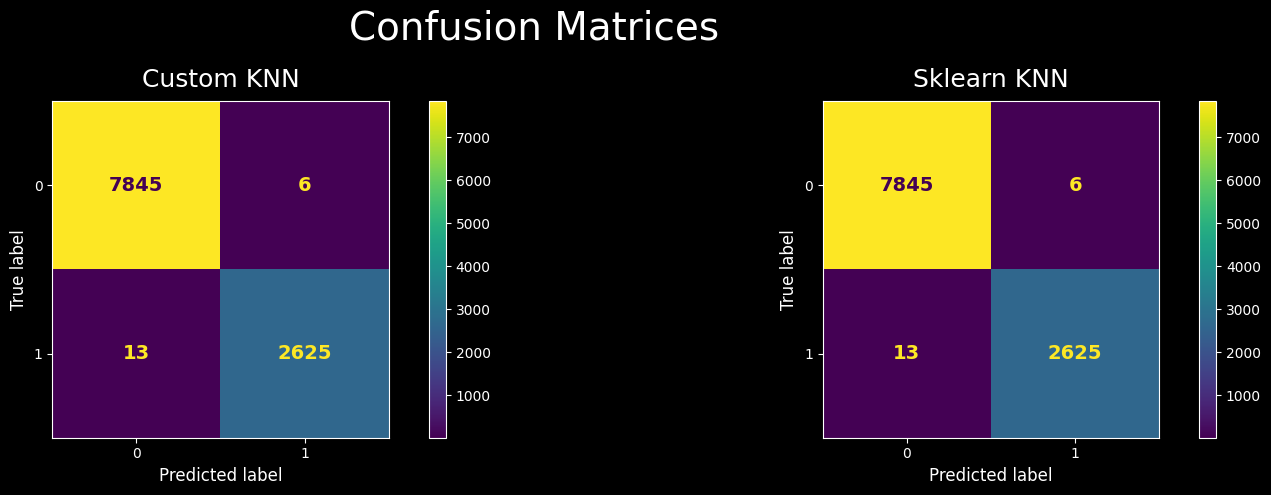

In [23]:
plt.figure(figsize=(16,5))

plt.suptitle(t="Confusion Matrices")

for index, model in enumerate(models):
    plt.subplot(1, 2, index + 1)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=model["y_pred"])
    cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    cm.plot(ax=plt.gca())
    plt.title(model["name"], pad=10)

    # Customize font properties
    for i in range(cm.text_.shape[0]):
        for j in range(cm.text_.shape[1]):
            text = cm.text_[i, j]
            text.set_fontsize(14)
            text.set_fontweight('bold')

plt.tight_layout()
plt.show()

## ROC Curve for custom and sklearn models

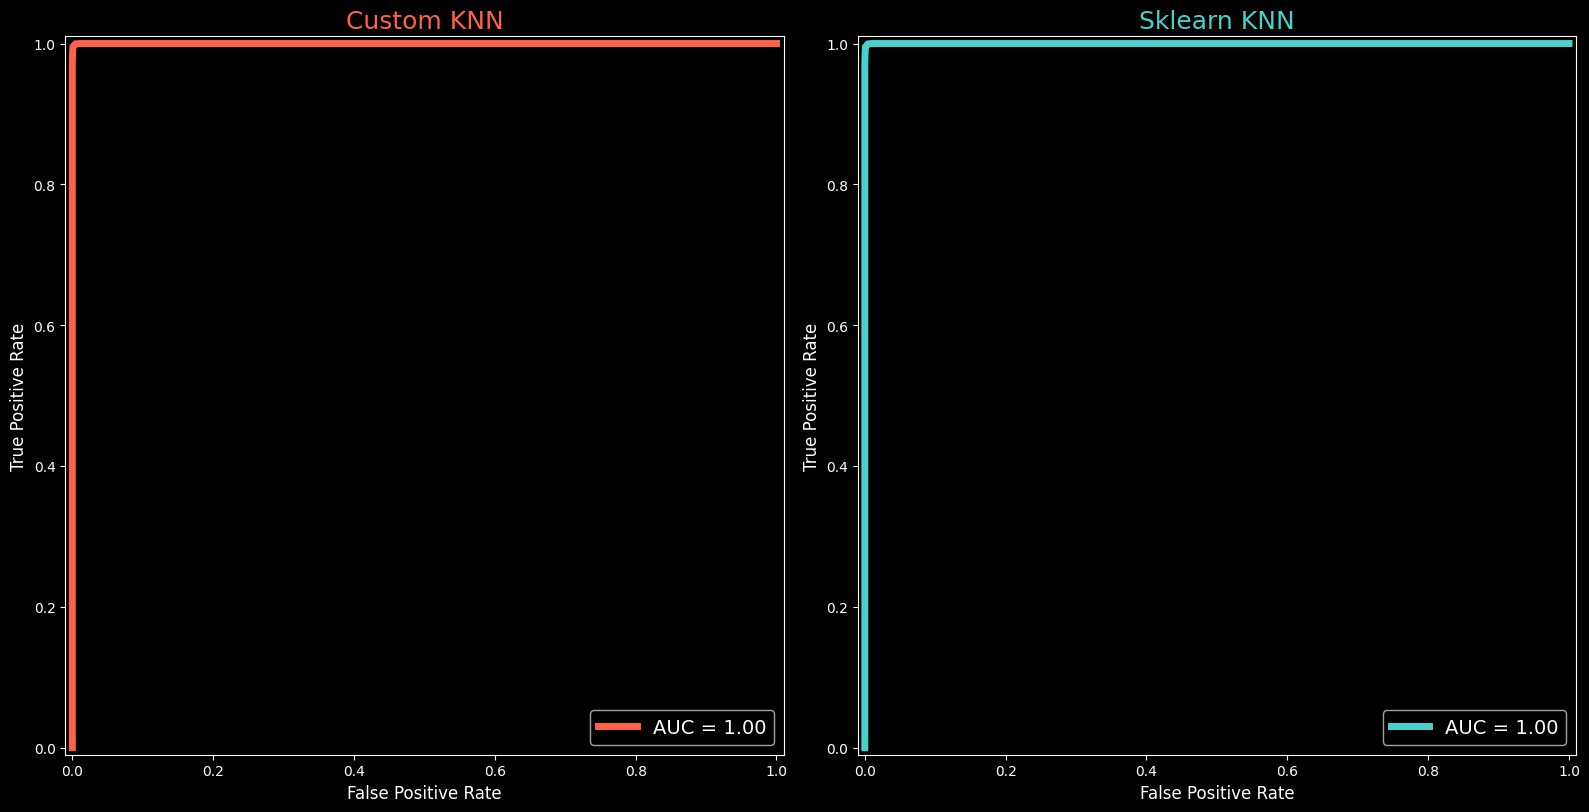

In [35]:
Plot.set_plot_params()
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

for index, model in enumerate(models):
    y_score = model["y_pred_proba"][:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
    roc_auc = auc(fpr, tpr)

    ax[index].set_title(label=model["name"], color=model["color"])

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot(ax=ax[index], color=model["color"], linewidth=5)

## Classification reports for custom and sklearn models

### Custom model

In [27]:
for model in models:
    print(f"--------------------- {model["name"]} ---------------------")
    print(classification_report(y_true=y_test, y_pred=model["y_pred"]))

--------------------- Custom KNN ---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7851
           1       1.00      1.00      1.00      2638

    accuracy                           1.00     10489
   macro avg       1.00      1.00      1.00     10489
weighted avg       1.00      1.00      1.00     10489

--------------------- Sklearn KNN ---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7851
           1       1.00      1.00      1.00      2638

    accuracy                           1.00     10489
   macro avg       1.00      1.00      1.00     10489
weighted avg       1.00      1.00      1.00     10489



## Conclusion

This project demonstrated a complete end-to-end implementation of a **K-Nearest Neighbors (KNN)** model for classifying user preferences between mountains and beaches, comparing a custom-built KNN model to the scikit-learn implementation. Key steps included data exploration, feature engineering, model selection, and evaluation.

Upon analyzing the dataset, we observed that certain features, such as preferred activities and proximity to specific environments, correlated closely with the target variable. This allowed us to focus on relevant columns to enhance prediction accuracy.

After tuning hyperparameters, both the custom and scikit-learn models achieved optimal performance with similar **accuracy** rates, ultimately reaching **100%** on the test dataset. This similarity in results confirms the reliability of our custom KNN model while validating the approach through the established scikit-learn implementation.

In summary, this project highlights that for well-defined datasets with clear feature-target relationships, KNN can effectively classify user preferences. Future extensions could involve experimenting with additional classifiers, larger datasets, or cross-validation for even more robust evaluations.